# Module 3 : Homework
**Prof. Bruce Hamilton**  
**Winter 2016**

* * *

## Correcting the Professor.
  
Nxf1 encodes a protein recruited to RNPs during nucleocytoplasmic transport. It has previously been demonstrated that for 6 of 7 target genes with a particular kind of retrotransposon in an intron, the Nxf1 allele was strongly correlated with the level of target gene expression.  Specifically, the “C” allele of Nxf1 allowed a higher level of target gene RNA expression than the “B” allele (no difference was detected in the 7th gene) with ~2x effect size.  
  
The research question is whether expression of an 8th gene that has the same class of retrotransposon in an intron is Nxf1-dependent like the majority of the others.  The tables downloaded in class (B6.txt and balbF2.txt) contain relative gene expression values from two different RT-qPCR experiments on different sets of animals. Both experiments are measuring the same (8th) gene, which has the retrotransposon inserted into an intron, just like the previously reported gene. The samples are NOT explicitly paired.

#### 1. Is this a one-tailed or a two-tailed test and why?

#### 2.a. What test statistic(s) would be most appropriate to compare data in B6.txt and why?  

For this test I am using the wilcoxin rank sum test because the data are not paired and there is an outlier in the dataset. According to the var test, the data have equal variance, but the result is not very strong. The wilcoxin rank sum test allows for unequal variance between the samples.

#### 2.b. Perform the test in R.

In [33]:
b6<-read.table("adamts_B6.txt",header=T)
attach(b6)
b6

The following objects are masked from b6 (pos = 4):

    cohort, id, normal, nxf1, raw



,id,nxf1,raw,normal,cohort
1,N30F4.192,B,0.005473881,0.002223781,B6
2,N30F4.196,B,0.005268219,0.00214023,B6
3,N30F4.202,B,0.0219772,0.008928305,B6
4,N30F4.207,B,0.002978839,0.001210162,B6
5,N30F4.217,B,0.003176875,0.001290615,B6
6,N30F4.218,B,0.003622804,0.001471775,B6
7,N30F4.199,C,0.02649444,0.01076345,B6
8,N30F4.210,C,0.004281812,0.001739499,B6
9,N30F4.215,C,0.006276129,0.002549696,B6
10,N30F4.216,C,0.007962358,0.003234732,B6


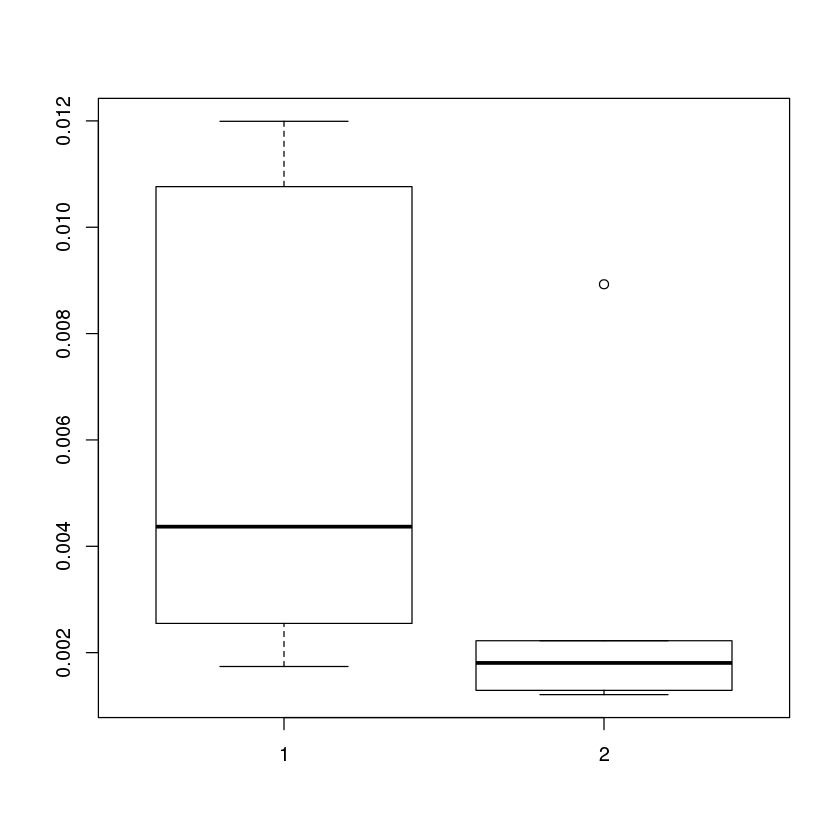

In [34]:
boxplot(normal[nxf1=="C"],normal[nxf1=="B"])

In [35]:
t.test(normal[nxf1=="C"],normal[nxf1=="B"],alternative="greater", paired=F)


	Welch Two Sample t-test

data:  normal[nxf1 == "C"] and normal[nxf1 == "B"]
t = 1.4216, df = 8.8214, p-value = 0.09477
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.000902692          Inf
sample estimates:
  mean of x   mean of y 
0.005963691 0.002877478 


In [36]:
wilcox.test(normal[nxf1=="C"],normal[nxf1=="B"],alternative="greater")


	Wilcoxon rank sum test

data:  normal[nxf1 == "C"] and normal[nxf1 == "B"]
W = 30, p-value = 0.03247
alternative hypothesis: true location shift is greater than 0


In [37]:
shapiro.test(normal[nxf1=="C"]-normal[nxf1=="B"])


	Shapiro-Wilk normality test

data:  normal[nxf1 == "C"] - normal[nxf1 == "B"]
W = 0.97567, p-value = 0.9281


In [38]:
var.test(normal[nxf1=="C"],normal[nxf1=="B"])


	F test to compare two variances

data:  normal[nxf1 == "C"] and normal[nxf1 == "B"]
F = 2.1522, num df = 5, denom df = 5, p-value = 0.4201
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.3011574 15.3803433
sample estimates:
ratio of variances 
          2.152186 


#### 3. What test statistic(s) would be most appropriate to compare data in F2.txt?  Perform the test in R. (For this exercise, you may either exclude the heterozygous individual, EB216, or treat as if C; extra credit–does this sample matter to your overall conclusion?)

*Notes: usage of “less” or “greater” for direction of the test has opposite meaning in the two tests; see Details in the help page for each test: >?ks.test and >?wilcox.test.  The ks.test does not allow conditional calls to normal.f2~nxf1.f2*

Again the data are not paired, so I will use a non-parametric test. Also, since there is an unequal number of samples in each cohort, I will use the wilcoxin rank sum test (also known as the Mann-Whitney test).

In [18]:
balbF2<-read.table("adamts_balbF2.txt",header=T)
attach(balbF2)
balbF2

,id.f2,nxf1.f2,raw.f2,normal.f2,cohort.f2
1,EB026,B,7e-05,0.000740424,4/3/09
2,EB211,B,0.00012,0.001157392,4/3/09
3,EB030,B,0.00014,0.001380945,4/3/09
4,EB034,B,0.00022,0.002208735,4/3/09
5,EB319,B,0.00091,0.009084916,4/3/09
6,EB189,B,0.00213,0.001081516,4/15/09
7,EB237,B,0.0031,0.001573233,4/15/09
8,EB279,B,0.00349,0.001772814,4/15/09
9,EB222,B,0.00372,0.001890922,4/15/09
10,EB342,B,0.00214,0.001334754,4/16/09


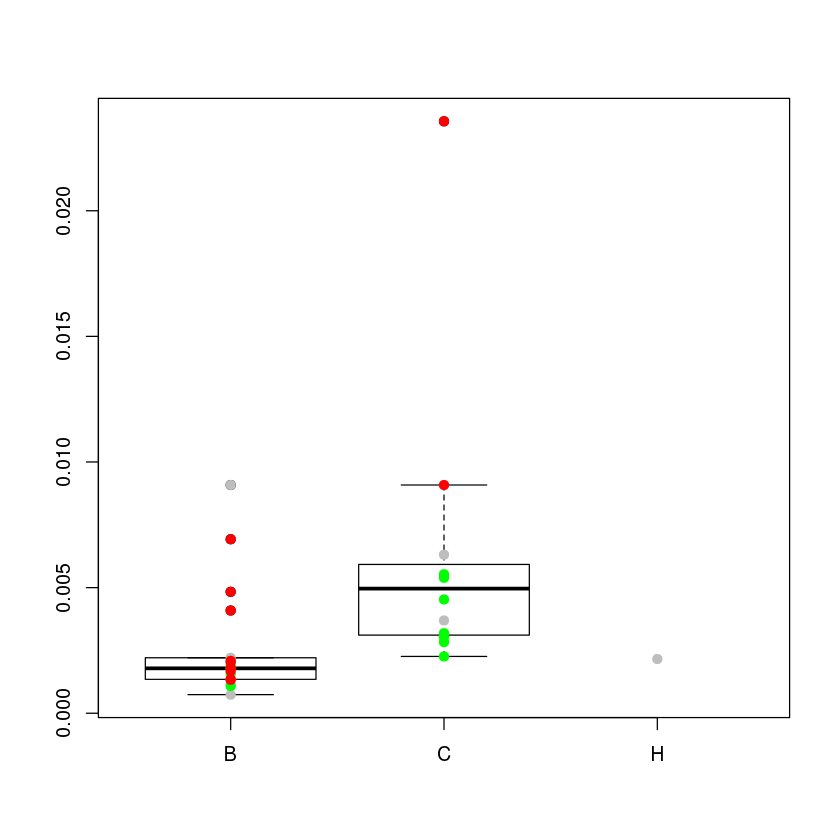

In [21]:
boxplot(normal.f2[1:30]~nxf1.f2[1:30])
## boxplot of all the data except the heterozygote
points(normal.f2[cohort.f2=='4/3/09']~nxf1.f2[cohort.f2=='4/3/09'],pch=19,col="grey")
## what do you see for the grey points for the first data cohort?
points(normal.f2[cohort.f2=='4/15/09']~nxf1.f2[cohort.f2=='4/15/09'],pch=19,col="green")
## what do you see for the green points?
points(normal.f2[cohort.f2=='4/16/09']~nxf1.f2[cohort.f2=='4/16/09'],pch=19,col="red")
## what do you see for the red points?

In [12]:
shapiro.test(normal.f2[nxf1.f2=="C"]-normal.f2[nxf1.f2=="B"])

Warning message:
In normal.f2[nxf1.f2 == "C"] - normal.f2[nxf1.f2 == "B"]: longer object length is not a multiple of shorter object length


	Shapiro-Wilk normality test

data:  normal.f2[nxf1.f2 == "C"] - normal.f2[nxf1.f2 == "B"]
W = 0.81146, p-value = 0.002215


In [16]:
var.test(normal.f2[nxf1.f2=="C"],normal.f2[nxf1.f2=="B"])


	F test to compare two variances

data:  normal.f2[nxf1.f2 == "C"] and normal.f2[nxf1.f2 == "B"]
F = 6.666, num df = 11, denom df = 17, p-value = 0.0005963
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  2.322932 21.875334
sample estimates:
ratio of variances 
          6.665978 


In [25]:
wilcox.test(normal.f2[nxf1.f2[19:31]],normal.f2[nxf1.f2[1:18]],alternative="greater")

Warning message:
In wilcox.test.default(normal.f2[nxf1.f2[19:31]], normal.f2[nxf1.f2[1:18]], : cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  normal.f2[nxf1.f2[19:31]] and normal.f2[nxf1.f2[1:18]]
W = 234, p-value = 3.405e-08
alternative hypothesis: true location shift is greater than 0


In [26]:
wilcox.test(normal.f2[nxf1.f2[19:30]],normal.f2[nxf1.f2[1:18]],alternative="greater")

Warning message:
In wilcox.test.default(normal.f2[nxf1.f2[19:30]], normal.f2[nxf1.f2[1:18]], : cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  normal.f2[nxf1.f2[19:30]] and normal.f2[nxf1.f2[1:18]]
W = 216, p-value = 4.156e-08
alternative hypothesis: true location shift is greater than 0


#### 4. What do you conclude about the influence of Nxf1 on gene 8?  How strong is the evidence overall?

#### 5. Are parametric or non-parametric test more sensitive to outliers values?

* * *

## Some helpful bits of R.

#### Creates an object “b6” that holds the data table in b6.txt.

In [3]:
b6<-read.table("hot.txt",header=T)

#### Allows R to call a column of data according to its header.

In [4]:
attach(b6)

#### Calls up the documentation page for the t-test implementation, including expected or allowable arguments, which may define the version of the test that is run (paired, unpaired, 2-tailed, alternative directions for 1-tailed, etc.).

In [5]:
?t.test

t.test {stats},R Documentation
x,a (non-empty) numeric vector of data values.
y,an optional (non-empty) numeric vector of data values.
alternative,"a character string specifying the alternative hypothesis, must be one of ""two.sided"" (default), ""greater"" or ""less"". You can specify just the initial letter."
mu,a number indicating the true value of the mean (or difference in means if you are performing a two sample test).
paired,a logical indicating whether you want a paired t-test.
var.equal,a logical variable indicating whether to treat the two variances as being equal. If TRUE then the pooled variance is used to estimate the variance otherwise the Welch (or Satterthwaite) approximation to the degrees of freedom is used.
conf.level,confidence level of the interval.
formula,a formula of the form lhs ~ rhs where lhs is a numeric variable giving the data values and rhs a factor with two levels giving the corresponding groups.
data,an optional matrix or data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector specifying a subset of observations to be used.


#### Calls up the documentation page for the non-parametric tests, including the Wilcoxon rank sum (a.k.a. Mann-Whitney, unpaired samples including unequal numbers) and Wilcoxon signed rank (paired samples, must be equal numbers)

In [6]:
?wilcox.test

wilcox.test {stats},R Documentation
x,"numeric vector of data values. Non-finite (e.g., infinite or missing) values will be omitted."
y,an optional numeric vector of data values: as with x non-finite values will be omitted.
alternative,"a character string specifying the alternative hypothesis, must be one of ""two.sided"" (default), ""greater"" or ""less"". You can specify just the initial letter."
mu,a number specifying an optional parameter used to form the null hypothesis. See ‘Details’.
paired,a logical indicating whether you want a paired test.
exact,a logical indicating whether an exact p-value should be computed.
correct,a logical indicating whether to apply continuity correction in the normal approximation for the p-value.
conf.int,a logical indicating whether a confidence interval should be computed.
conf.level,confidence level of the interval.
formula,a formula of the form lhs ~ rhs where lhs is a numeric variable giving the data values and rhs a factor with two levels giving the corresponding groups.


#### Calls only the values of “stuff” from rows 1-6 of the data table.

In [8]:
lukewarm[1:6]

[1] 0.4202 0.4718 0.5351 0.4955 0.4299 0.5609

#### As an argument to plot sets the range of y to values of 0-5.

In [9]:
ylim=c(0,5) 

* * *

([Return to top.](#Module-3-:-Homework))

* * *